In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'

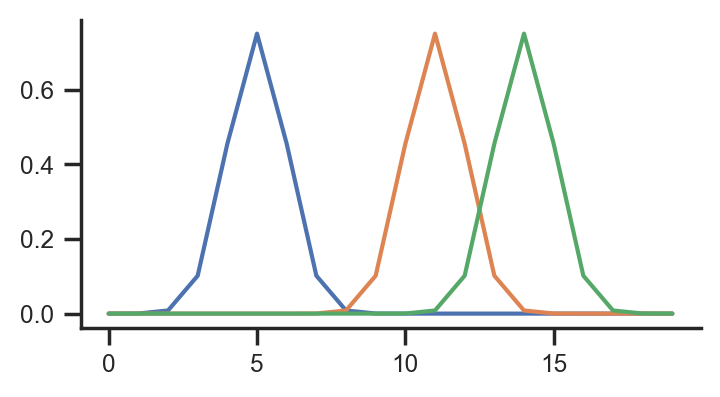

In [3]:
lam = np.arange(0, 20)

sigma = 1
s1 = np.exp(-((lam - 5) ** 2) / (2 * sigma**2))
s2 = np.exp(-((lam - 11) ** 2) / (2 * sigma**2))
s3 = np.exp(-((lam - 14) ** 2) / (2 * sigma**2))

# set 2 norm of all si to 1
s1 = s1 / np.linalg.norm(s1)
s2 = s2 / np.linalg.norm(s2)
s3 = s3 / np.linalg.norm(s3)

# plot the pdfs
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.plot(lam, s1, label="s1")
ax.plot(lam, s2, label="s2")
ax.plot(lam, s3, label="s3")
plt.show()

In [4]:
def do_plot(m1, m2, y=None):
    lam = np.arange(0, 20, 0.2)
    sigma = 3

    s1 = np.exp(-((lam - 5) ** 2) / (2 * sigma**2))
    s2 = np.exp(-((lam - 13) ** 2) / (2 * sigma**2))
    s3 = np.exp(-((lam - 14) ** 2) / (2 * sigma**2))

    s1 = s1 / np.linalg.norm(s1)
    s2 = s2 / np.linalg.norm(s2)
    s3 = s3 / np.linalg.norm(s3)
    t1 = s1 - s3
    t2 = s2 - s3
    M = np.array([[m1], [m2]])

    if y is None:
        y = s3 + m1 * t1 + m2 * t2
    else:
        y = y / np.linalg.norm(y)

    G = np.array([[np.dot(t1, t1), np.dot(t1, t2)], [np.dot(t2, t1), np.dot(t2, t2)]])
    H = np.array([[np.dot(y - s3, t1)], [np.dot(y - s3, t2)]])

    M_ = np.linalg.inv(G) @ H

    alpha = np.arccos(np.dot(t1, t2) / (np.linalg.norm(t1) * np.linalg.norm(t2)))
    P = np.array([[np.linalg.norm(t1), np.linalg.norm(t2) * np.cos(alpha)], [0, np.linalg.norm(t2) * np.sin(alpha)]])
    V = P @ M_
    V = np.squeeze(V)

    return V[0], V[1], [np.round(m1, 3), np.round(m2, 3), np.round(1 - m1 - m2, 3)]


step = 0.05
l = []
for m1 in np.arange(0, 1 + step, step):
    for m2 in np.arange(0, 1 + step, step):
        if m1 + m2 <= 1:
            l.append(do_plot(m1, m2))

step = 0.02
l2 = []
for m1 in np.arange(-0.1, 1 + step, step):
    for m2 in np.arange(-0.1, 1 + step, step):
        if m1 < 0 or m2 < 0 or (m1 + m2 > 1):
            l2.append(do_plot(m1, m2))

lam = np.arange(0, 20, 0.2)
eye = np.eye(lam.size)

l3 = []
for i in range(eye.shape[0]):
    l3.append(do_plot(m1=2, m2=2, y=1 - np.squeeze(eye[i, :])))

In [6]:
# make data frames from projections
df = pd.DataFrame(l, columns=["x", "y", "anno"])
df["anno"] = df["anno"].astype(str)

df2 = pd.DataFrame(l2, columns=["x", "y", "anno"])
df2["anno"] = df2["anno"].astype(str)

df3 = pd.DataFrame(l3, columns=["x", "y", "anno"])
df3["anno"] = df3["anno"].astype(str)

# df = pd.concat([df,df2,df3])
# df['color'] = np.concatenate([np.repeat('nonegative', len(l)),
#                               np.repeat('negative', len(l2)),
#                               np.repeat('boundary', len(l3))])

df = pd.concat([df, df2])
df["color"] = np.concatenate([np.repeat("nonegative", len(l)), np.repeat("negative", len(l2))])

fig = px.scatter(
    df, x="x", y="y", width=500, height=500, range_x=[-0.5, 2], range_y=[-0.5, 2], color="color", hover_data=["anno"]
)
fig.update_traces(marker=dict(size=4))

fig.show()

In [ ]:
# pending: how to calculate the boundary (orthant of all possible non-negative spectra)